Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Processing

In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
# calculating the BMR
bmr_male = 88.362 + (13.397 * calories_data['Weight']) + (4.799 * calories_data['Height']) - (5.677 * calories_data['Age'])
bmr_female = 447.593 + (9.247 * calories_data['Weight']) + (3.098 * calories_data['Height']) - (4.330 * calories_data['Age'])
male = calories_data[calories_data['Gender'] == 'male']
male['BMR'] = round(bmr_male)
female = calories_data[calories_data['Gender'] == 'female']
female['BMR'] = round(bmr_female)
bmr_data = pd.concat([male, female], axis=0)

# combining the dataframe
calories_data_new = pd.concat([calories_data, bmr_data['BMR']], axis=1)
calories_data_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMR
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1873.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1430.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1614.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1511.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1344.0
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0,1754.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0,1443.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0,1290.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0,1871.0


In [ ]:
exercise_train_data , exercise_test_data = train_test_split(calories_data_new , test_size = 0.2 , random_state = 1)


In [ ]:
for data in [exercise_train_data , exercise_test_data]:         # adding BMI column to both training and test sets
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

exercise_train_data["Categorized_BMI"] = pd.cut(exercise_train_data["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)

exercise_train_data["Categorized_BMI"] = exercise_train_data["Categorized_BMI"].astype("object") # converting 'categorical' dtype intp 'object' dtype for "Categorized_BMI" column
exercise_train_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMR,BMI,Categorized_BMI
2643,10344110,male,62,172.0,81.0,14.0,88.0,40.5,68.0,1647.0,27.38,Overweight
13352,19227008,male,77,182.0,83.0,28.0,108.0,40.8,241.0,1637.0,25.06,Overweight
13117,13443153,female,73,170.0,71.0,16.0,91.0,40.2,83.0,1315.0,24.57,Normal
2560,15271999,male,76,176.0,81.0,24.0,94.0,40.7,154.0,1587.0,26.15,Overweight
14297,16014653,male,42,183.0,77.0,7.0,93.0,39.8,32.0,1760.0,22.99,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
905,17253275,female,25,162.0,62.0,19.0,99.0,40.6,101.0,1415.0,23.62,Normal
5192,10623679,male,24,187.0,91.0,6.0,84.0,39.0,16.0,2069.0,26.02,Overweight
12172,10878569,male,52,199.0,94.0,15.0,99.0,39.9,94.0,2007.0,23.74,Normal
235,19921858,female,70,175.0,74.0,9.0,79.0,40.0,34.0,1371.0,24.16,Normal


In [ ]:
ds = exercise_train_data["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

,Categorized_BMI,Count
0,Normal,7819
1,Overweight,4181


Data Visualization

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


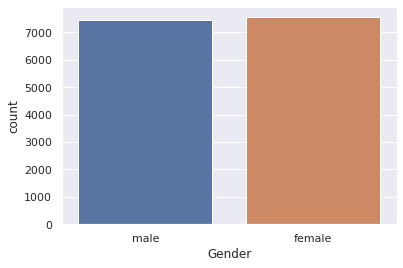

In [ ]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


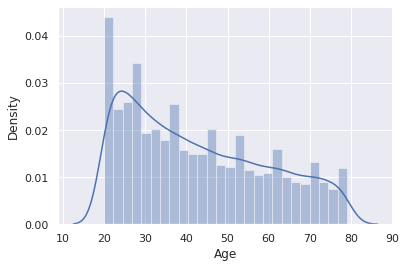

In [ ]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


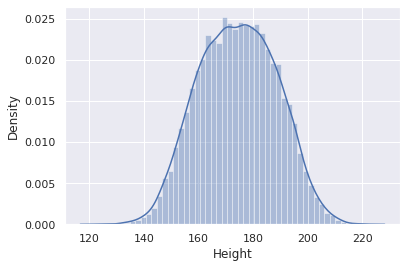

In [ ]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


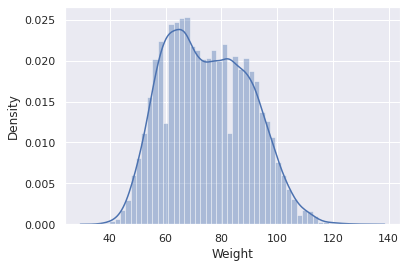

In [ ]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = calories_data.corr()

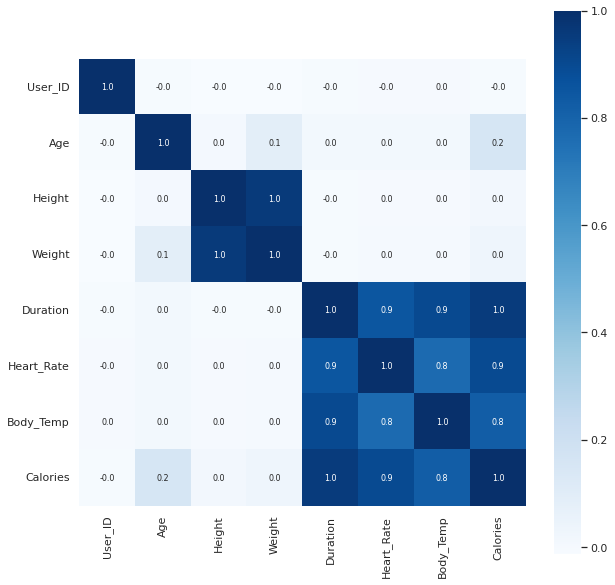

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [ ]:
x = calories_data.drop(columns=['User_ID','Calories'], axis=1)
y = calories_data['Calories']

In [ ]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(x_train, y_train)

[10:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

Prediction on Test Data

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(y_pred)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


Mean Absolute Error

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7159012502233186
Mean Squared Error: 14.506464988228966
Root Mean Squared Error: 3.8087353528735712


Mean Absolute Error: 8.385188053147187
Mean Squared Error: 130.08707386188374
Root Mean Squared Error: 11.405572053250276


,MEA,MSE,RMSE
XGBoost,2.715901,14.506465,3.808735
Linear Regression,8.385188,130.087074,11.405572


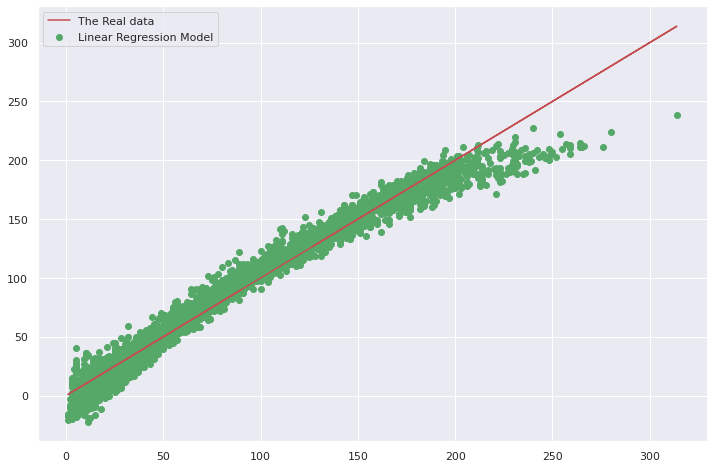

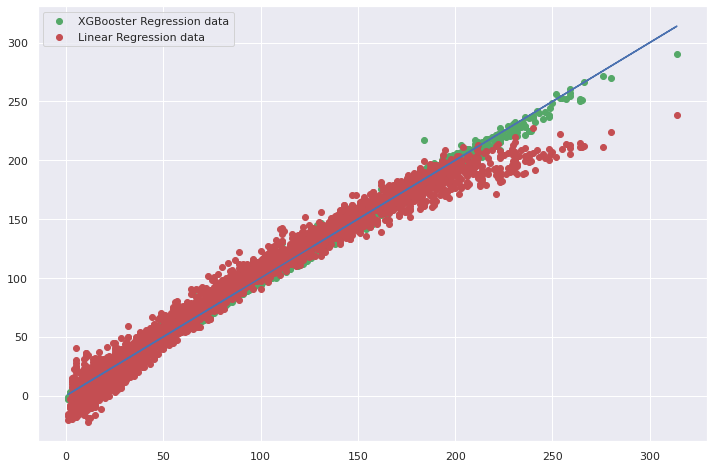

In [ ]:
reg = linear_model.LinearRegression() 
result = reg.fit(x_train,y_train) 
y_pred1 = reg.predict(x_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1))) 
plt.figure(figsize=(12,8)) 
plt.scatter(y_test,y_pred1, color = 'g', label = 'Linear Regression Model') 
plt.plot(y_test,y_test,color='r',label='The Real data') 
plt.legend() 

plt.figure(figsize=(12,8)) 
plt.plot(y_test,y_test) 
plt.scatter(y_test,y_pred, color = 'g', label = 'XGBooster Regression data') 
plt.scatter(y_test,y_pred1, color = 'r', label = 'Linear Regression data')
plt.legend() 
def get_metrics(a,b): 
    # Function to get all metrics into a list 
    MEA = metrics.mean_absolute_error(a,b) 
    MSE = metrics.mean_squared_error(a,b) 
    RMSE = np.sqrt(metrics.mean_squared_error(a,b)) 
    return [MEA,MSE,RMSE] 
get_metrics(y_pred,y_test) 
metrics = {'XGBoost' : get_metrics(y_test,y_pred),
           'Linear Regression': get_metrics(y_pred1,y_test)}
comparison = pd.DataFrame(metrics,index=['MEA','MSE','RMSE'])  # DataFrame 
comparison =comparison.transpose()
comparison